In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datos

Guardo las tablas necesarias para la segmentación y genero copias de las mismas

In [2]:
factOnlineSales = pd.read_csv('csvs/FactOnlineSales.csv')
dimCustomer = pd.read_csv('csvs/DimCustomer.csv')
dimDate = pd.read_csv('csvs/DimDate.csv')

In [3]:
factOnlineSales_copy = factOnlineSales.copy()
dimCustomer_copy = dimCustomer.copy()
dimDate_copy = dimDate.copy()

# Preparación

Teniendo los datos almacenados ahora voy a buscar generar una segmentación de clientes teniendo en cuenta las ventas online del año 2009, esta segmentación tendrá como base la frecuencia y los montos de compra (sin tener en cuenta los descuentos) de cada persona.

In [4]:
#Datos de 2009

OnlineSales = factOnlineSales_copy.merge(dimDate_copy, on='DateKey')
OnlineSales = OnlineSales[OnlineSales['CalendarYear']==2009]

#datos de las compras sin tener en cuenta los descuentos

OnlineSales['purchaseNoDiscount'] = OnlineSales['UnitPrice'] - OnlineSales['DiscountAmount']

#groupby customers by purchase and frecuency

CustomerPurchaseData = OnlineSales.groupby('CustomerKey')['purchaseNoDiscount'].sum().reset_index()
CustomerFrecuencyData = OnlineSales.groupby('CustomerKey').size().reset_index(name='PurchaseFrequency')
customerData = pd.merge(CustomerPurchaseData, CustomerFrecuencyData, on='CustomerKey')

#merge customer table with dimCustomer = purchase_frequency

onlineSalesCustomerData = customerData.merge(dimCustomer_copy, on='CustomerKey')
onlineSalesCustomerData.head()

,CustomerKey,purchaseNoDiscount,PurchaseFrequency,Unnamed: 0,GeographyKey,FirstName,LastName,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,Education,Occupation,HouseOwnerFlag,NumberCarsOwned
0,1,61538.2800,141,0,680,Jon,Yang,1966-04-08,M,M,90000.0,2.0,0.0,Bachelors,Professional,1.0,0.0
1,2,663.1985,21,1,692,Eugene,Huang,1965-05-14,S,M,60000.0,3.0,3.0,Bachelors,Professional,0.0,1.0
2,3,663.1985,21,2,493,Ruben,Torres,1965-08-12,M,M,60000.0,3.0,3.0,Bachelors,Professional,1.0,1.0
3,4,663.1985,21,3,519,Christy,Zhu,1968-02-15,S,F,70000.0,0.0,0.0,Bachelors,Professional,0.0,1.0
4,5,662.7545,21,4,706,Elizabeth,Johnson,1968-08-08,S,F,80000.0,5.0,5.0,Bachelors,Professional,1.0,4.0


# Analisis

El analisis de estos clientes es meramente demografico, tiene en cuenta su comportamiento de gastos pero no hace enfasis en productos o canales de compra.

Prestaré atención al aparete comportamiento de correlación entre la frecuencia y el monto total de compra, y el monto total con los ingresos anuales. Teniendo tan alta cantidad de datos es posible ver graficamente aquellos montos extremadamente elevados que no permiten ver el resto.

In [5]:
pd.options.display.float_format = '{:,.2f}'.format
onlineSalesCustomerData.describe()


,CustomerKey,purchaseNoDiscount,PurchaseFrequency,Unnamed: 0,GeographyKey,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned
count,"17,810.00","17,810.00","17,810.00","17,810.00","17,810.00","17,810.00","17,810.00","17,810.00","17,810.00","17,810.00"
mean,"9,307.70","48,742.21",280.80,"9,357.90",575.15,"187,213.92",1.87,1.07,0.68,1.49
std,"5,414.77","588,241.35","3,260.48","5,430.28",84.28,"1,122,889.71",1.62,1.56,0.47,1.16
min,1.00,23.80,1.00,0.00,423.00,"10,000.00",0.00,0.00,0.00,0.00
25%,"4,622.25","1,122.75",8.00,"4,635.25",506.00,"40,000.00",0.00,0.00,0.00,1.00
50%,"9,296.50","2,532.35",21.00,"9,363.50",567.00,"60,000.00",2.00,0.00,1.00,1.00
75%,"13,965.75","3,038.39",30.00,"14,066.75",645.00,"80,000.00",3.00,2.00,1.00,2.00
max,"19,145.00","15,097,858.51","66,278.00","18,868.00",952.00,"10,000,000.00",5.00,5.00,1.00,4.00


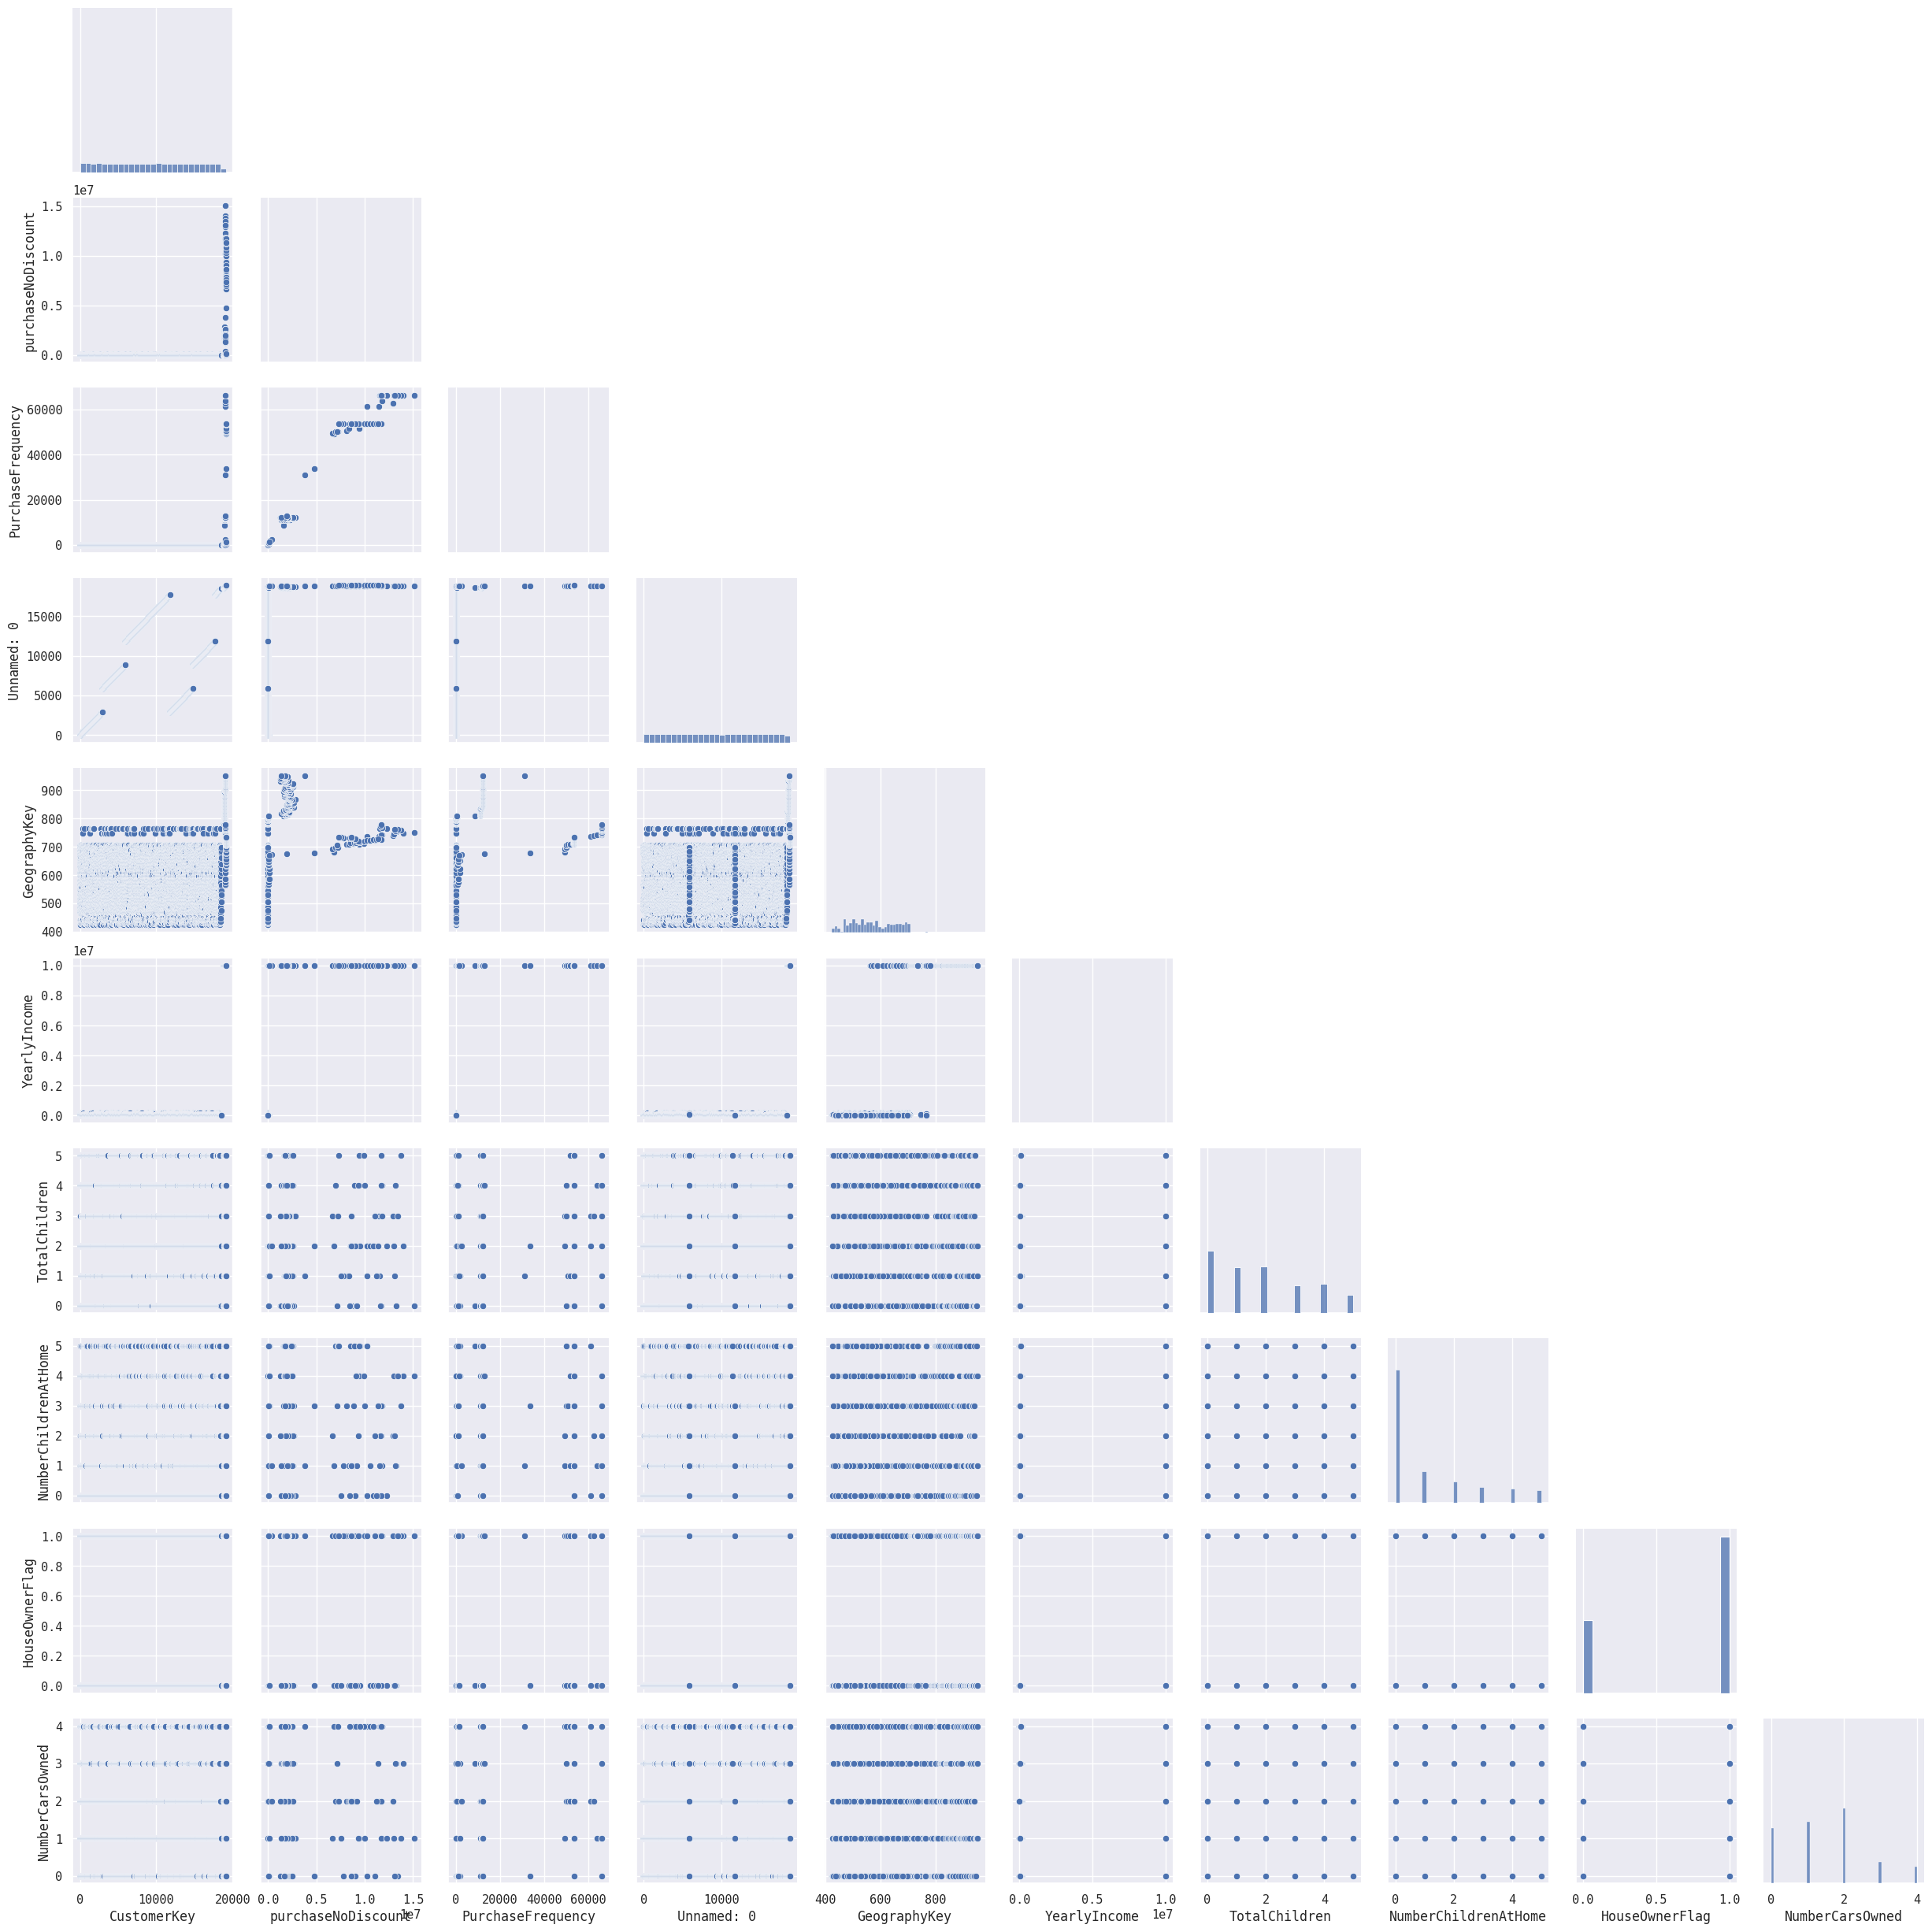

In [6]:
sns.set_theme(style='darkgrid',  font='monospace', font_scale=1)

sns.pairplot(onlineSalesCustomerData, diag_kind='hist', corner=True)
plt.show()

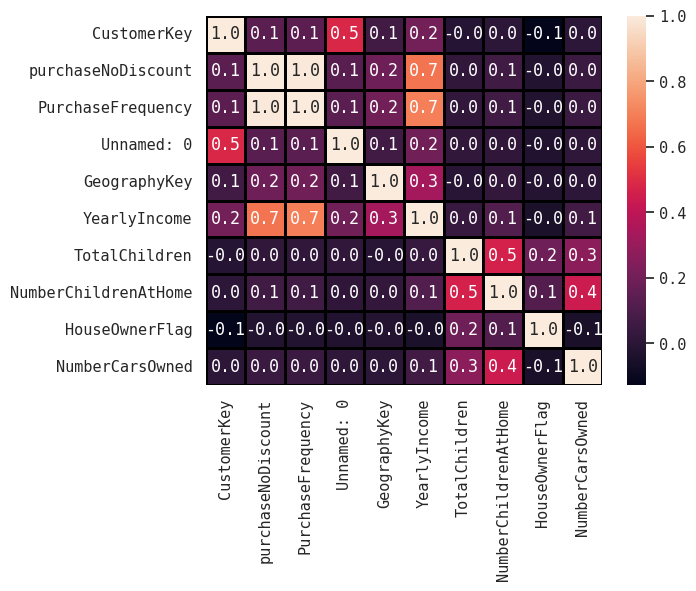

In [22]:
corr = onlineSalesCustomerData.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.1f', linewidths=1, linecolor='black')
plt.show()

Los outliers son mas que obvios, la mayor parte de los datos se presenta en personas que gastaron en el año menos de 5 mil dolares y tienen menos de 50 registros de compra, cuando hay mas de 15 millones de dolares y 60 mil resgistros de compra a nombre de los valores maximos.

Lo mas probable es que esta empresa de tecnologia presenta un cierto numero de distribuidores que representan el 94 porciento de sus ventas, aquellos puntos mas pequeños (de hecho los de mayor cantidad) pueden ser personas del común que le compran directamente a la marca.

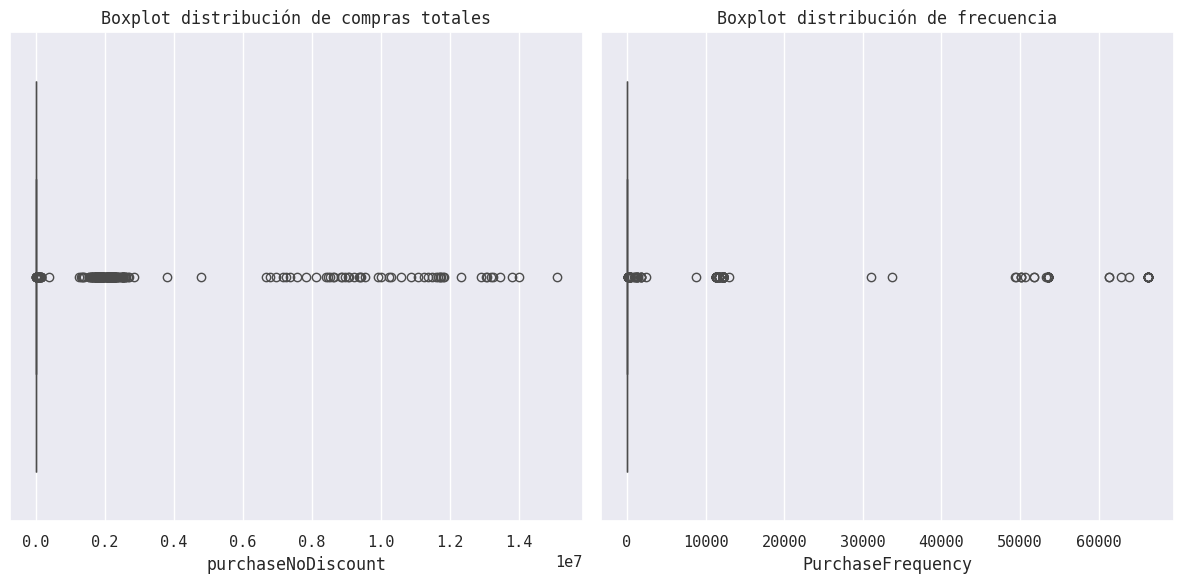

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfica 1
sns.boxplot(data=onlineSalesCustomerData, x='purchaseNoDiscount', ax=axes[0])
axes[0].set_title('Boxplot distribución de compras totales')

# Gráfica 2
sns.boxplot(data=onlineSalesCustomerData, x='PurchaseFrequency', ax=axes[1])
axes[1].set_title('Boxplot distribución de frecuencia')

plt.tight_layout()
plt.show()

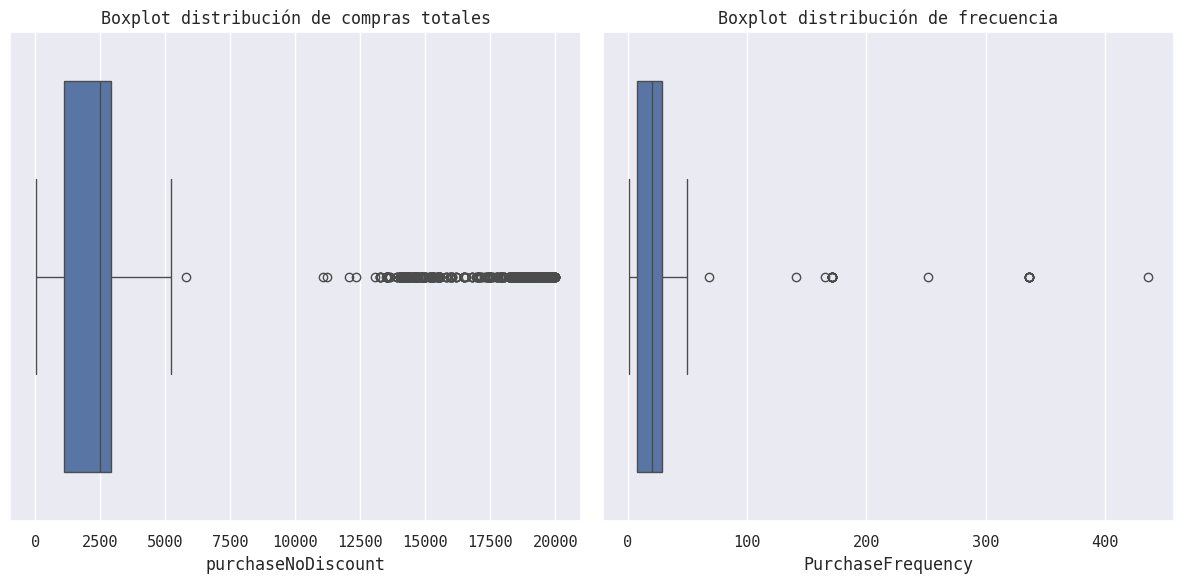

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfica 1
sns.boxplot(data=onlineSalesCustomerData[onlineSalesCustomerData['purchaseNoDiscount'] < 20000], x='purchaseNoDiscount', ax=axes[0])
axes[0].set_title('Boxplot distribución de compras totales < 20000')

# Gráfica 2
sns.boxplot(data=onlineSalesCustomerData[onlineSalesCustomerData['PurchaseFrequency'] < 500], x='PurchaseFrequency', ax=axes[1])
axes[1].set_title('Boxplot distribución de frecuencia < 500')

plt.tight_layout()
plt.show()

In [7]:
#Porcentaje representativo de registros mayores a 20000 dolares

(onlineSalesCustomerData.query('purchaseNoDiscount > 20000')['purchaseNoDiscount'].sum() /
 onlineSalesCustomerData['purchaseNoDiscount'].sum()) * 100

94.24526255282302

# Segmentación

La siguiente segmentación se divide en dos partes. 
En vista de que hay datos sumamente desproporcionados y el algoritmo k-means se basa en la distancia euclideana, es neceseraio repetir el algoritmo dentro del pequeño grupo señalado con el color morado, este hace referencia a sumas de compras menores a 400 mil dolares.
La segunda grafica representa vistas ampliadas de la segmentación original, mostrando lo que se logra agrupar en la escala menor a 400 mil dolares y las escala menor a 40 mil

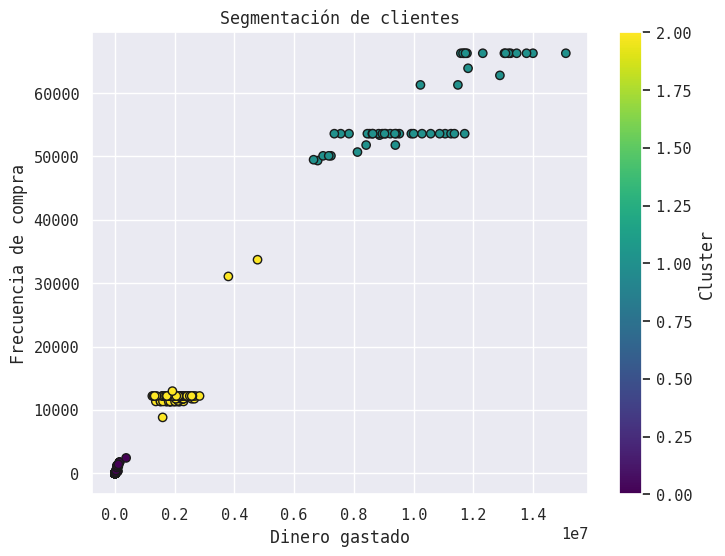

In [8]:
#Agrupación basada en compra y frecuencia

x = onlineSalesCustomerData['purchaseNoDiscount'].values
y = onlineSalesCustomerData['PurchaseFrequency'].values

#standar scaler

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
x = x.reshape(-1,1)
y = y.reshape(-1,1)
x_std = stdsc.fit_transform(x)
y_std = stdsc.transform(y)

#k-means segmentation

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=15, random_state=42)
kmeans.fit(x_std, y_std)
onlineSalesCustomerData['Cluster'] = kmeans.labels_
plt.figure(figsize=(8, 6))
plt.scatter(onlineSalesCustomerData['purchaseNoDiscount'], onlineSalesCustomerData['PurchaseFrequency'], c=onlineSalesCustomerData['Cluster'], cmap='viridis', edgecolors='k')
plt.title('Segmentación de clientes')
plt.colorbar(label='Cluster')
plt.xlabel('Dinero gastado')
plt.ylabel('Frecuencia de compra')
plt.grid(True)
plt.show()

Para los siguientes cluster se toma el grupo 0 (grupo de color morado)

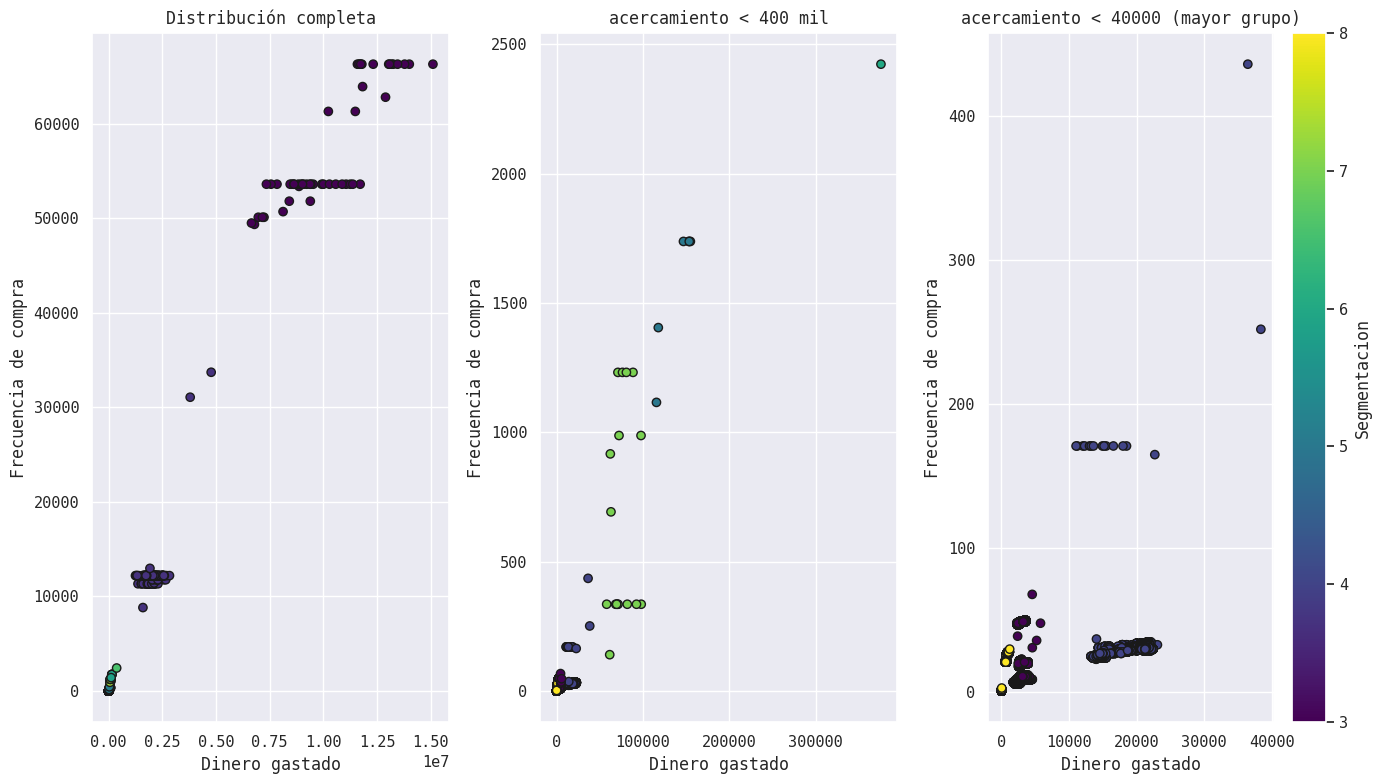

In [9]:
#cluster 0

x = onlineSalesCustomerData.query('Cluster == 0')['purchaseNoDiscount'].values
y = onlineSalesCustomerData.query('Cluster == 0')['PurchaseFrequency'].values

#standar scaler

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
x = x.reshape(-1,1)
y = y.reshape(-1,1)
x_std = stdsc.fit_transform(x)
y_std = stdsc.transform(y)

#k-means segmentation cluster 0 y asignación de todos los label

clusters2 = KMeans(n_clusters=6, n_init=15, random_state=42)
clusters2.fit(x_std, y_std)
labels2 = clusters2.labels_

labels2 += onlineSalesCustomerData['Cluster'].max() + 1  

onlineSalesCustomerData['Segmentacion'] = onlineSalesCustomerData['Cluster']
onlineSalesCustomerData.loc[onlineSalesCustomerData['Cluster'] == 0, 'Segmentacion'] = labels2

#Datos para la grafica del cluster 0

dfGrupo0 = onlineSalesCustomerData[onlineSalesCustomerData['Cluster'] == 0] 

#Datos para la tercera grafica, ampliando mas lo contenido en el grupo 0

dfGrupo0_ampliado = onlineSalesCustomerData[onlineSalesCustomerData['purchaseNoDiscount'] < 40000] #Grafica grupo 0


#Graficas

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14, 8))
sc1 = ax1.scatter(onlineSalesCustomerData['purchaseNoDiscount'], onlineSalesCustomerData['PurchaseFrequency'], c=onlineSalesCustomerData['Segmentacion'], cmap='viridis', edgecolors='k')
ax1.set_xlabel('Dinero gastado')
ax1.set_ylabel('Frecuencia de compra')
ax1.set_title('Distribución completa')

sc2 = ax2.scatter(dfGrupo0['purchaseNoDiscount'], dfGrupo0['PurchaseFrequency'], c=dfGrupo0['Segmentacion'], cmap='viridis', edgecolors='k')
ax2.set_title('acercamiento < 400 mil')
ax2.set_xlabel('Dinero gastado')
ax2.set_ylabel('Frecuencia de compra')

sc3 = ax3.scatter(dfGrupo0_ampliado['purchaseNoDiscount'], dfGrupo0_ampliado['PurchaseFrequency'], c=dfGrupo0_ampliado['Segmentacion'], cmap='viridis', edgecolors='k')
ax3.set_title('acercamiento < 40000 (mayor grupo)')
ax3.set_xlabel('Dinero gastado')
ax3.set_ylabel('Frecuencia de compra')
fig.colorbar(sc3, label='Segmentacion', ax=ax3, cmap='viridis')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
onlineSalesCustomerData['Segmentacion'].value_counts()

3    11637
8     4651
4     1310
2      137
1       51
7       17
5        6
6        1
Name: Segmentacion, dtype: int64

# Grafica final

las siguiente grafica muestra las caracteristicas demograficas de cada uno de los grupos (promedio de sus datos), ademas de un resumen de lo que representan en compras.

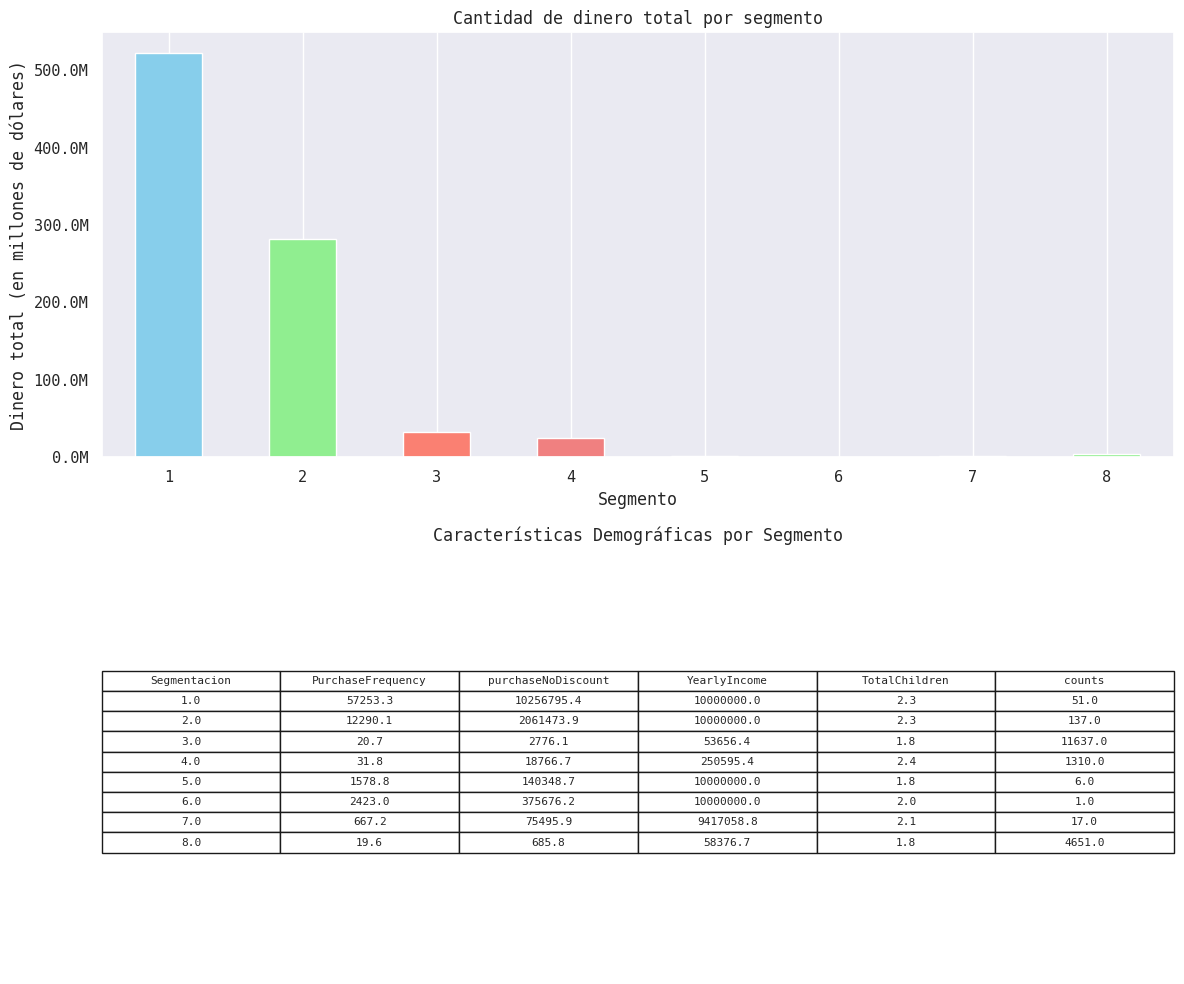

In [11]:
from matplotlib.ticker import FuncFormatter

# Gráfico de barras: Dinero total por segmento
money_per_cluster = onlineSalesCustomerData.groupby('Segmentacion')['purchaseNoDiscount'].sum()
colors = ['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'gold', 'mediumpurple']

# Función para formatear los números en millones
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

# Tabla: Características demográficas por segmento
means = onlineSalesCustomerData.groupby('Segmentacion')[['PurchaseFrequency', 'purchaseNoDiscount', 'YearlyIncome', 'TotalChildren']].mean()
counts = onlineSalesCustomerData.groupby('Segmentacion').size().reset_index(name="counts")
means_counts = pd.merge(means, counts, on='Segmentacion')


# Graficas 

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Gráfico de barras
money_per_cluster.plot(kind='bar', ax=ax1, color=colors)
ax1.set_title('Cantidad de dinero total por segmento')
ax1.set_xlabel('Segmento')
ax1.set_ylabel('Dinero total (en millones de dólares)')
ax1.yaxis.set_major_formatter(FuncFormatter(millions))
ax1.grid(axis='y')
ax1.tick_params(axis='x', rotation=0)

# Tabla
ax2.axis('off')  
means_counts_rounded = means_counts.round(1)

cell_text = []
for row in range(len(means_counts_rounded)):
    cell_text.append([str(val) for val in means_counts_rounded.iloc[row]])

ax2.table(cellText=cell_text,
          colLabels=means_counts_rounded.columns,
          cellLoc='center',
          loc='center')

ax2.set_title('Características Demográficas por Segmento')

plt.tight_layout()
plt.show()